# 5. 콜라보 여부에 따른 마케팅별 평균 평점 및 판매 순위 유의미성 분석 t-test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumGothic'

## 5-1-1. 선크림 콜라보 여부에 따른 평균 평점 t-test

In [2]:
# 선크림 파일 불러오기
suncream_df = pd.read_csv("./preprocessed_data/preprocessed_suncream_data.csv",encoding="utf-8",low_memory=False)

In [3]:
# 인플루언서와 콜라보한 경우 제품명 주요 키워드(people_keywords)
people_keywords = ['호시','최혜선','규진','디렉터','레오제이','더보이즈 큐','구성환',
                   '박세리','인씨','옮니','세븐틴 승관','안다','한동희','김혜수',
                   '유이수']
# 캐릭터와 콜라보한 경우 제품명 주요 키워드(character_keywords)
character_keywords = ['카카오프렌즈','조구만','폼폼푸린','포차코','오롤리','보노보노','라운드어라운드 컴포트 그린티 수분 선크림']

In [4]:
#캐릭터와 콜라보한 제품
character_filtered_df = suncream_df[suncream_df['product_name'].str.contains('|'.join(character_keywords))]
#인플루언서와 콜라보한 제품
people_filtered_df = suncream_df[suncream_df['product_name'].str.contains('|'.join(people_keywords))]
#캐릭터 + 인플루언서와 콜라보한 제품
colabo_filtered_df = suncream_df[suncream_df['product_name'].str.contains('|'.join(character_keywords+people_keywords))]
#콜라보하지 않은 제품
non_colabo_filtered_df = suncream_df[~suncream_df['product_name'].str.contains('|'.join(people_keywords + character_keywords))]

In [5]:
# 각 콜라보 여부별 제품들의 평균 평점
character_star_mean = character_filtered_df['star'].mean()
people_star_mean = people_filtered_df['star'].mean()
colabo_star_mean = colabo_filtered_df['star'].mean()
non_colabo_star_mean = non_colabo_filtered_df['star'].mean()

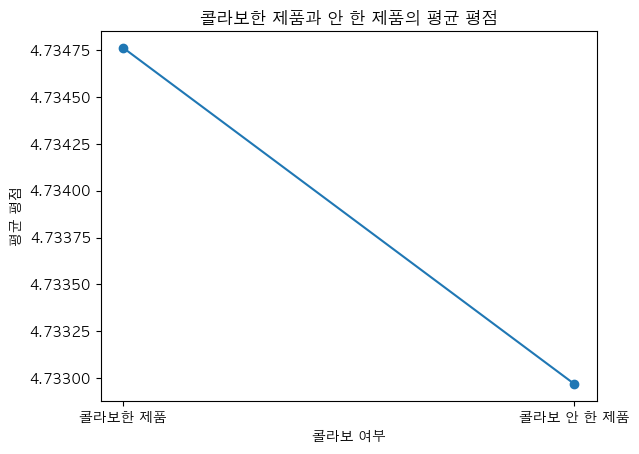

In [6]:
#콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['콜라보한 제품','콜라보 안 한 제품'] 
y = [colabo_star_mean, non_colabo_star_mean] 

plt.plot(x, y, marker='o')

plt.title('콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [7]:
# 콜라보한 제품과 안한 제품 평점 등분산 검정
statistics, pvalue = stats.levene(colabo_filtered_df['star'],non_colabo_filtered_df['star'])
if pvalue > 0.05:
    print("Levene's test p-value: ",pvalue, "등분산 가정 만족")
else:
    print("Levene's test p-value: ",pvalue, "이분산 가정 만족")

Levene's test p-value:  0.697998716008017 등분산 가정 만족


In [8]:
# 콜라보한 제품과 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = colabo_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = True)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  0.3880242042215703
p-value:  0.697998716003901
귀무가설이 성립됩니다.


#### 선크림에서는 콜라보한 제품과 콜라보 안한 제품의 평균 평점은 크게 차이가 없었습니다.

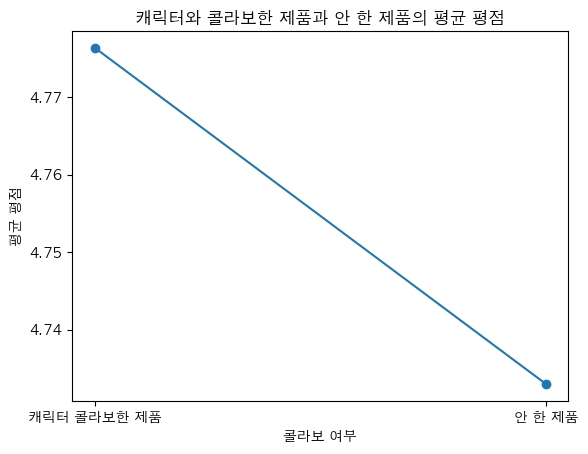

In [9]:
#캐릭터 콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['캐릭터 콜라보한 제품','안 한 제품'] 
y = [character_star_mean, non_colabo_star_mean] 

plt.plot(x, y, marker='o')

plt.title('캐릭터와 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()


In [10]:
# 캐릭터 콜라보한 제품과 콜라보 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(character_filtered_df['star'],non_colabo_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [11]:
# 캐릭터 콜라보한 제품과 콜라보 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = character_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = False)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  6.431983565860387
p-value:  1.3178506604011761e-10
귀무가설을 기각합니다.


#### 선크림에서는 캐릭터 콜라보한 제품이 콜라보 안한 제품보다 평균 평점은 높았습니다.

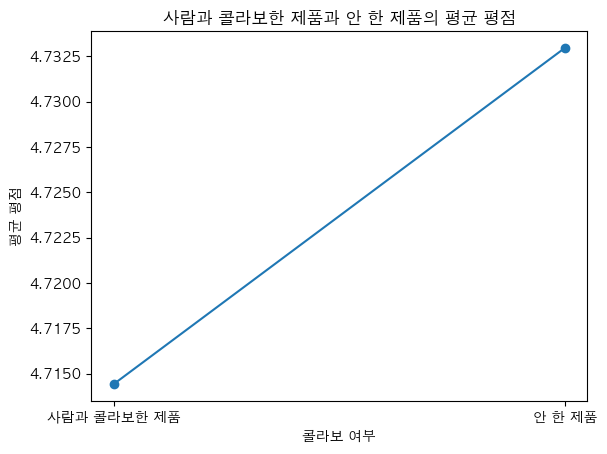

In [12]:
#인플루언서&연예인 콜라보한 제품과 콜라보 안 한 제품들의 평균 차이 그래프
x = ['사람과 콜라보한 제품','안 한 제품'] 
y = [people_star_mean, non_colabo_star_mean] 

plt.plot(x, y, marker='o')

plt.title('사람과 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [13]:
# 연예인&인플루언서 콜라보한 제품과 콜라보 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(people_filtered_df['star'],non_colabo_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [14]:
# 연예인&인플루언서 콜라보한 제품과 콜라보 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = people_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = False)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  -3.191830573753917
p-value:  0.001415769134906782
귀무가설을 기각합니다.


#### 선크림에서는 인플루언서가 광고한 제품보다 안한 제품이 평균평점이 더 높았습니다.

## 5-1-2. 선크림 콜라보 여부에 따른 구매 순위

In [19]:
#구매순위로 제품 크롤링한 파일
suncream_buy_rank_df = pd.read_csv("./crawling_data/suncream_buy_rank.csv",encoding="utf-8")

In [20]:
#인덱스로 순위 매기기
suncream_buy_rank_df['rank'] = suncream_buy_rank_df.index + 1

In [21]:
# 인플루언서 & 연예인과 콜라보한 제품
people_buy_df = suncream_buy_rank_df[suncream_buy_rank_df['product_name'].str.contains('|'.join(people_keywords))]
# 캐릭터와 콜라보한 제품
character_buy_df = suncream_buy_rank_df[suncream_buy_rank_df['product_name'].str.contains('|'.join(character_keywords))]
# 콜라보하지 않은 제품
excluded_buy_df = suncream_buy_rank_df[~suncream_buy_rank_df['product_name'].str.contains('|'.join(people_keywords + character_keywords))]

In [23]:
# 평균 구매 순위
excluded_rank_mean = excluded_buy_df['rank'].mean()
people_rank_mean = people_buy_df['rank'].mean()
character_buy_mean = character_buy_df['rank'].mean()

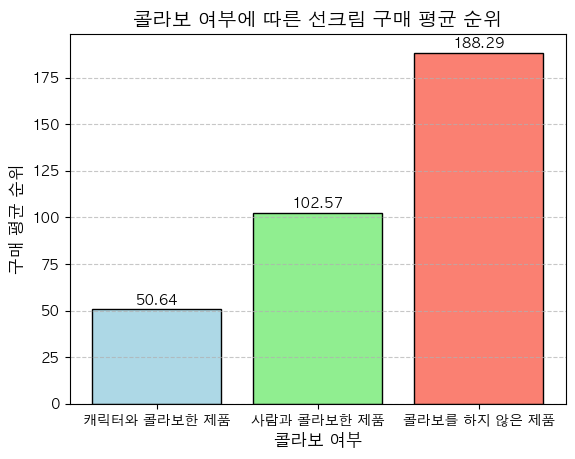

In [24]:
# 구매순위 그래프
x = ['캐릭터와 콜라보한 제품', '사람과 콜라보한 제품', '콜라보를 하지 않은 제품'] 
y = [character_buy_mean, people_rank_mean, excluded_rank_mean]


colors = ['lightblue', 'lightgreen', 'salmon'] 
plt.bar(x, y, color=colors, edgecolor='black')

for i in range(len(x)):
    plt.text(i, y[i] + 1, f'{y[i]:.2f}', ha='center', va='bottom')

plt.title('콜라보 여부에 따른 선크림 구매 평균 순위', fontsize=14, fontweight='bold')
plt.xlabel('콜라보 여부', fontsize=12)
plt.ylabel('구매 평균 순위', fontsize=12)

plt.ylim(0, max(y) + 10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 5-2-1. 선쿠션 콜라보 여부에 따른 평균 평점 t-test

In [25]:
suncushion_df = pd.read_csv("./preprocessed_data/preprocessed_suncushion_data.csv",encoding="utf-8")

In [26]:
# 인플루언서와 콜라보한 경우 제품명 주요 키워드(people_keywords)
people_keywords = ["프롬젤라", "더보이즈 큐", "세븐틴 승관"]
# 캐릭터와 콜라보한 경우 제품명 주요 키워드(character_keywords)
character_keywords =  ["보노보노", "배스킨", "산리오", "오롤리", "배라콜라보"]

In [27]:
#캐릭터와 콜라보한 제품
character_filtered_df = suncushion_df[suncushion_df['product_name'].str.contains('|'.join(character_keywords))]
#인플루언서와 콜라보한 제품
people_filtered_df = suncushion_df[suncushion_df['product_name'].str.contains('|'.join(people_keywords))]
#캐릭터 + 인플루언서와 콜라보한 제품
colabo_filtered_df = suncushion_df[suncushion_df['product_name'].str.contains('|'.join(character_keywords+people_keywords))]
#콜라보하지 않은 제품
non_colabo_filtered_df = suncushion_df[~suncushion_df['product_name'].str.contains('|'.join(people_keywords + character_keywords))]

In [28]:
# 각 콜라보 여부별 제품들의 평균 평점
character_star_mean = character_filtered_df['star'].mean()
people_star_mean = people_filtered_df['star'].mean()
colabo_star_mean = colabo_filtered_df['star'].mean()
non_colabo_star_mean = non_colabo_filtered_df['star'].mean()

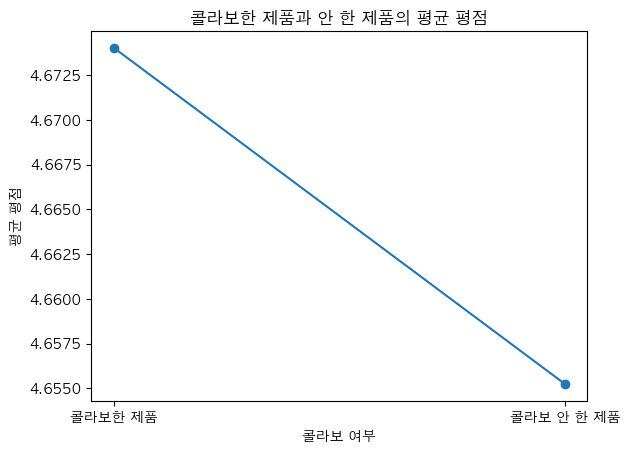

In [29]:
#콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['콜라보한 제품','콜라보 안 한 제품'] 
y = [colabo_star_mean, non_colabo_star_mean] 

plt.plot(x, y, marker='o')

plt.title('콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [30]:
# 콜라보한 제품과 안한 제품 평점 등분산 검정
statistics, pvalue = stats.levene(colabo_filtered_df['star'],non_colabo_filtered_df['star'])
if pvalue > 0.05:
    print("Levene's test p-value: ",pvalue, "등분산 가정 만족")
else:
    print("Levene's test p-value: ",pvalue, "이분산 가정 만족")

Levene's test p-value:  0.13990922059763286 등분산 가정 만족


In [32]:
# 콜라보한 제품과 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = colabo_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = True)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  1.476210887960895
p-value:  0.13990922059780048
귀무가설이 성립됩니다.


#### 선쿠션에서는 콜라보한 제품과 콜라보 안한 제품의 평균 평점은 크게 차이가 없었습니다.

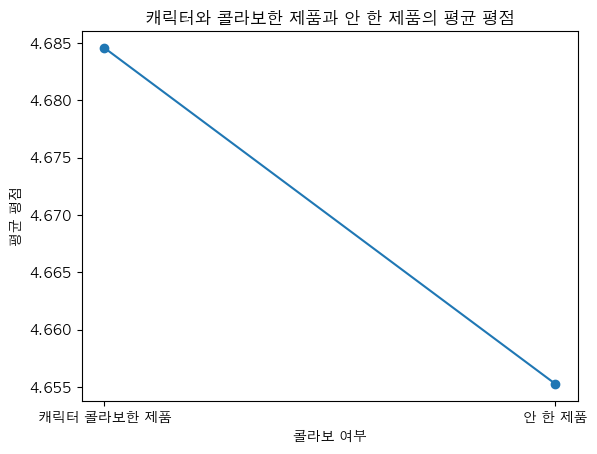

In [33]:
#캐릭터 콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['캐릭터 콜라보한 제품','안 한 제품']  
y = [character_star_mean, non_colabo_star_mean]  

plt.plot(x, y, marker='o')
plt.title('캐릭터와 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()


In [34]:
# 캐릭터 콜라보한 제품과 콜라보 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(character_filtered_df['star'],non_colabo_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [35]:
# 캐릭터 콜라보한 제품과 콜라보 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = character_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = False)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  2.110427667168725
p-value:  0.03484760813885398
귀무가설을 기각합니다.


#### 선쿠션에서는 캐릭터 콜라보한 제품이 안한 제품보다 평균 평점은 높았습니다.

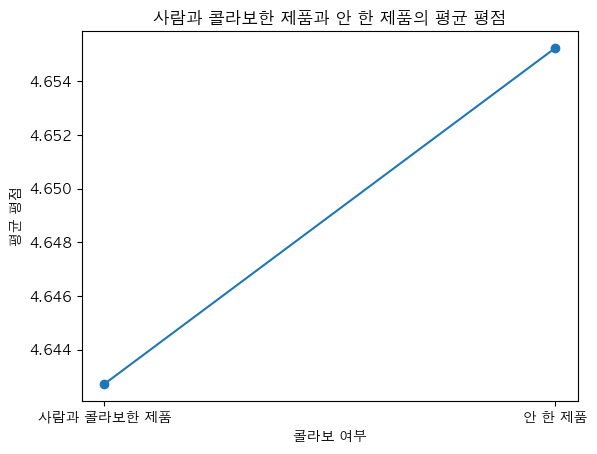

In [36]:
#인플루언서&연예인 콜라보한 제품과 콜라보 안 한 제품들의 평균 차이 그래프
x = ['사람과 콜라보한 제품','안 한 제품']  
y = [people_star_mean, non_colabo_star_mean]  

plt.plot(x, y, marker='o')
plt.title('사람과 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [37]:
# 연예인&인플루언서 콜라보한 제품과 콜라보 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(people_filtered_df['star'],non_colabo_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

등분산 가정 만족


In [38]:
# 연예인&인플루언서 콜라보한 제품과 콜라보 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = people_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = True)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  -0.5998732350826205
p-value:  0.5486046216515408
귀무가설이 성립됩니다.


#### 선쿠션에서는 인플루언서와 콜라보한 제품과 안한 제품의 평균 평점이 유의미한 차이가 없었습니다.

## 5-2-2. 선쿠션 콜라보 여부에 따른 구매 순위

In [39]:
#구매순위로 제품 크롤링한 파일
suncushion_buy_rank_df = pd.read_csv("./crawling_data/suncushion_buy_rank.csv",encoding="utf-8")

In [40]:
#인덱스로 순위 매기기
suncushion_buy_rank_df['rank'] = suncushion_buy_rank_df.index + 1

In [41]:
# 인플루언서 & 연예인과 콜라보한 제품
people_buy_df = suncushion_buy_rank_df[suncushion_buy_rank_df['product_name'].str.contains('|'.join(people_keywords))]
# 콜라보한 제품
colabo_buy_df = suncushion_buy_rank_df[suncushion_buy_rank_df['product_name'].str.contains('|'.join(people_keywords+character_keywords))]
# 캐릭터와 콜라보한 제품
character_buy_df = suncushion_buy_rank_df[suncushion_buy_rank_df['product_name'].str.contains('|'.join(character_keywords))]
# 콜라보하지 않은 제품
excluded_buy_df = suncushion_buy_rank_df[~suncushion_buy_rank_df['product_name'].str.contains('|'.join(people_keywords + character_keywords))]

In [42]:
# 콜라보 여부별 평균 구매 순위
colabo_rank_mean = colabo_buy_df['rank'].mean()
excluded_rank_mean = excluded_buy_df['rank'].mean()
people_rank_mean = people_buy_df['rank'].mean()
character_buy_mean = character_buy_df['rank'].mean()

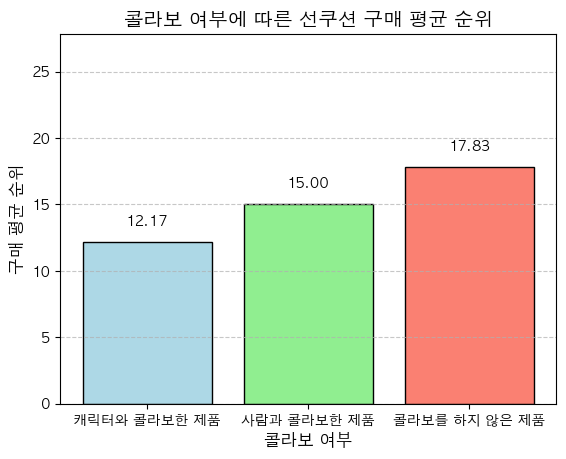

In [43]:
# 평균 구매 순위
x = ['캐릭터와 콜라보한 제품', '사람과 콜라보한 제품', '콜라보를 하지 않은 제품'] 
y = [character_buy_mean, people_rank_mean, excluded_rank_mean]

colors = ['lightblue', 'lightgreen', 'salmon']  
plt.bar(x, y, color=colors, edgecolor='black')

for i in range(len(x)):
    plt.text(i, y[i] + 1, f'{y[i]:.2f}', ha='center', va='bottom')


plt.title('콜라보 여부에 따른 선쿠션 구매 평균 순위', fontsize=14, fontweight='bold')
plt.xlabel('콜라보 여부', fontsize=12)
plt.ylabel('구매 평균 순위', fontsize=12)

plt.ylim(0, max(y) + 10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## 5-3-1. 선스틱 콜라보 여부에 따른 평균 평점 t-test

In [44]:
#선스틱 파일 불러오기
sunstic_df = pd.read_csv("./preprocessed_data/preprocessed_sunstic_data.csv",encoding="utf-8")

In [45]:
# 인플루언서와 콜라보한 경우 제품명 주요 키워드(people_keywords)
people_keywords = ["김고은", "박세리", "더보이즈 큐", "백송민", "안선영", "구성환"]
# 캐릭터와 콜라보한 경우 제품명 주요 키워드(character_keywords)
character_keywords =  ["보냉백"]

In [46]:
#캐릭터와 콜라보한 제품
character_filtered_df = sunstic_df[sunstic_df['product_name'].str.contains('|'.join(character_keywords))]
#인플루언서와 콜라보한 제품
people_filtered_df = sunstic_df[sunstic_df['product_name'].str.contains('|'.join(people_keywords))]
#캐릭터 + 인플루언서와 콜라보한 제품
colabo_filtered_df = sunstic_df[sunstic_df['product_name'].str.contains('|'.join(character_keywords+people_keywords))]
#콜라보하지 않은 제품
non_colabo_filtered_df = sunstic_df[~sunstic_df['product_name'].str.contains('|'.join(people_keywords + character_keywords))]

In [47]:
# 각 콜라보 여부별 제품들의 평균 평점
character_star_mean = character_filtered_df['star'].mean()
people_star_mean = people_filtered_df['star'].mean()
colabo_star_mean = colabo_filtered_df['star'].mean()
non_colabo_star_mean = non_colabo_filtered_df['star'].mean()

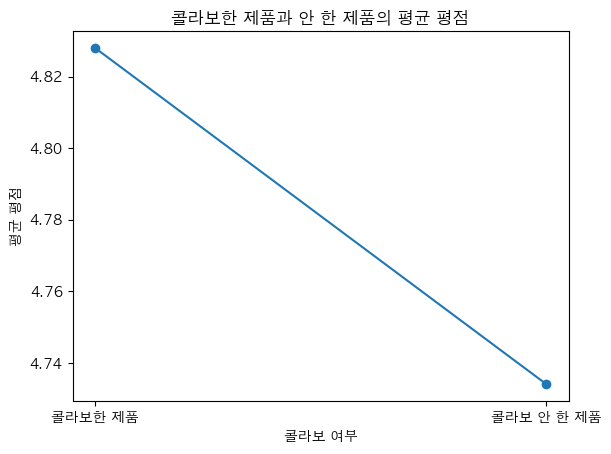

In [48]:
#콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['콜라보한 제품','콜라보 안 한 제품'] 
y = [colabo_star_mean, non_colabo_star_mean] 

plt.plot(x, y, marker='o')

plt.title('콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [49]:
# 콜라보한 제품과 안한 제품 평점 등분산 검정
statistics, pvalue = stats.levene(colabo_filtered_df['star'],non_colabo_filtered_df['star'])
if pvalue > 0.05:
    print("Levene's test p-value: ",pvalue, "등분산 가정 만족")
else:
    print("Levene's test p-value: ",pvalue, "이분산 가정 만족")

Levene's test p-value:  6.107254068400464e-24 이분산 가정 만족


In [50]:
# 콜라보한 제품과 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = colabo_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = False)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  11.221552056637123
p-value:  4.699449444864234e-29
귀무가설을 기각합니다.


#### 선스틱에서는 콜라보한 제품보다 콜라보 안한 제품의 평균 평점이 높았습니다.

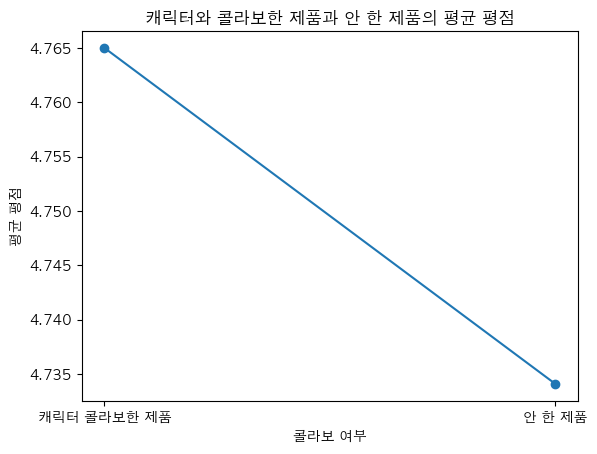

In [51]:
#캐릭터 콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['캐릭터 콜라보한 제품','안 한 제품']  
y = [character_star_mean, non_colabo_star_mean]  

plt.plot(x, y, marker='o')

plt.title('캐릭터와 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()


In [52]:
# 캐릭터 콜라보한 제품과 콜라보 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(character_filtered_df['star'],non_colabo_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

등분산 가정 만족


In [53]:
# 캐릭터 콜라보한 제품과 콜라보 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = character_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = True)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  1.5073137317152734
p-value:  0.13174515639777426
귀무가설이 성립됩니다.


#### 선스틱은 캐릭터 콜라보한 제품과 안한 제품의 평균 평점이 통계적으로 유의미하게 다르지 않았습니다.

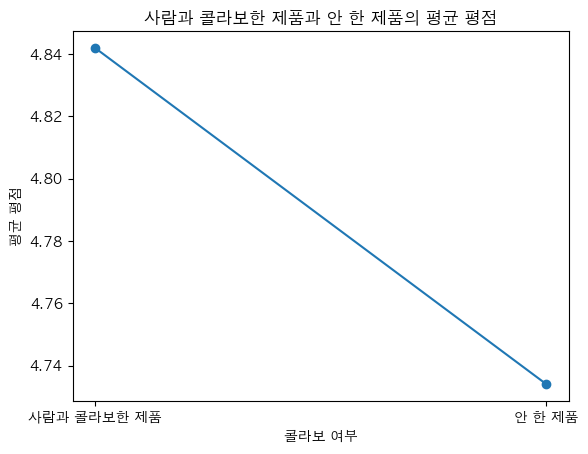

In [54]:
#인플루언서&연예인 콜라보한 제품과 콜라보 안 한 제품들의 평균 차이 그래프
x = ['사람과 콜라보한 제품','안 한 제품']  
y = [people_star_mean, non_colabo_star_mean] 

plt.plot(x, y, marker='o')

plt.title('사람과 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [62]:
# 연예인&인플루언서 콜라보한 제품과 콜라보 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(people_filtered_df['star'],non_colabo_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [63]:
# 연예인&인플루언서 콜라보한 제품과 콜라보 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = people_filtered_df['star'],
    b = non_colabo_filtered_df['star'],
    alternative = "two-sided",
    equal_var = False)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  12.266090164261358
p-value:  2.7916448957971166e-34
귀무가설을 기각합니다.


#### 선스틱은 인플루언서가 광고한 제품이 안한 제품보다 평균평점이 더 높았습니다.

## 5-3-2. 선스틱 콜라보 여부에 따른 구매 순위

In [64]:
#구매순위로 제품 크롤링한 파일
sunstic_buy_rank_df = pd.read_csv("./crawling_data/sunstic_buy_rank.csv",encoding="utf-8")

In [65]:
#인덱스로 순위 매기기
sunstic_buy_rank_df['rank'] = sunstic_buy_rank_df.index + 1

In [66]:
# 인플루언서 & 연예인과 콜라보한 제품
people_buy_df = sunstic_buy_rank_df[sunstic_buy_rank_df['product_name'].str.contains('|'.join(people_keywords))]
# 콜라보한 제품
colabo_buy_df = sunstic_buy_rank_df[sunstic_buy_rank_df['product_name'].str.contains('|'.join(people_keywords+character_keywords))]
# 캐릭터와 콜라보한 제품
character_buy_df = sunstic_buy_rank_df[sunstic_buy_rank_df['product_name'].str.contains('|'.join(character_keywords))]
# 콜라보하지 않은 제품
excluded_buy_df = sunstic_buy_rank_df[~sunstic_buy_rank_df['product_name'].str.contains('|'.join(people_keywords + character_keywords))]

In [67]:
# 콜라보 여부별 평균 구매 순위
colabo_rank_mean = colabo_buy_df['rank'].mean()
excluded_rank_mean = excluded_buy_df['rank'].mean()
people_rank_mean = people_buy_df['rank'].mean()
character_buy_mean = character_buy_df['rank'].mean()

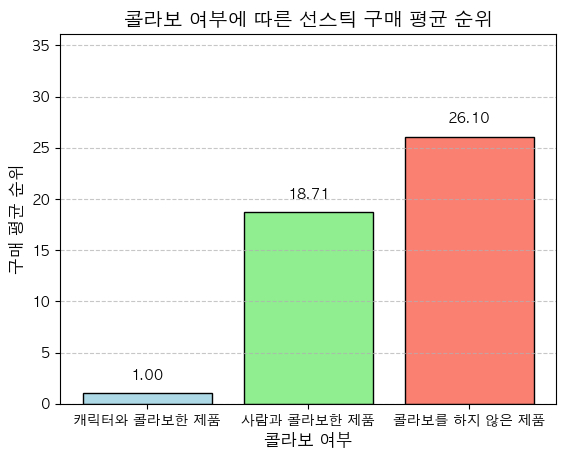

In [68]:
# 구매순위 그래프
x = ['캐릭터와 콜라보한 제품', '사람과 콜라보한 제품', '콜라보를 하지 않은 제품'] 
y = [character_buy_mean, people_rank_mean, excluded_rank_mean]

colors = ['lightblue', 'lightgreen', 'salmon'] 
plt.bar(x, y, color=colors, edgecolor='black')

for i in range(len(x)):
    plt.text(i, y[i] + 1, f'{y[i]:.2f}', ha='center', va='bottom')

plt.title('콜라보 여부에 따른 선스틱 구매 평균 순위', fontsize=14, fontweight='bold')
plt.xlabel('콜라보 여부', fontsize=12)
plt.ylabel('구매 평균 순위', fontsize=12)

plt.ylim(0, max(y) + 10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 5-4-1. 선패치 콜라보 여부에 따른 평균 평점 t-test

In [69]:
# 선패치 파일 불러오기
sunpatch_df = pd.read_csv("./preprocessed_data/preprocessed_sunpatch_data.csv",encoding="utf-8")

In [70]:
# 인플루언서와 콜라보한 경우 제품명 주요 키워드(people_keywords)
people_keywords = ['박세리']
# 선패치는 캐릭터 콜라보가 없음

In [71]:
#인플루언서와 콜라보한 제품
people_filtered_df = sunpatch_df[sunpatch_df['product_name'].str.contains('|'.join(people_keywords))]
#인플루언서와 콜라보하지 않은 제품
non_people_filtered_df = sunpatch_df[~sunpatch_df['product_name'].str.contains('|'.join(people_keywords))]

In [72]:
# 콜라보 여부별 제품들의 평균 평점
people_star_mean = people_filtered_df['star'].mean()
non_people_mean = non_people_filtered_df['star'].mean()

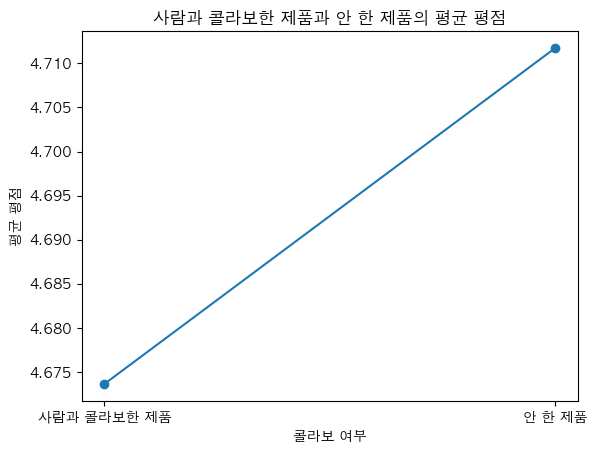

In [73]:
#콜라보한 제품과 안 한 제품들의 평균 차이 그래프
x = ['사람과 콜라보한 제품','안 한 제품']
y = [people_star_mean, non_people_mean]  

plt.plot(x, y, marker='o')

plt.title('사람과 콜라보한 제품과 안 한 제품의 평균 평점')
plt.xlabel('콜라보 여부')
plt.ylabel('평균 평점')

plt.show()

In [74]:
# 콜라보한 제품과 안한 제품 평점 등분산 검정
statistics, p_value = stats.levene(people_filtered_df['star'],non_people_filtered_df['star'])
if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

등분산 가정 만족


In [80]:
# 콜라보한 제품과 안한 제품 평균 평점 t-test
t_statistics, p_value = stats.ttest_ind(
    a = people_filtered_df['star'],
    b = non_people_filtered_df['star'],
    alternative = "two-sided",
    equal_var = True)
if p_value < 0.05:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설을 기각합니다.")
else:
    print("T-statistics: ", t_statistics)
    print("p-value: ", p_value)
    print("귀무가설이 성립됩니다.")

T-statistics:  -1.2346360322449326
p-value:  0.2170801068025357
귀무가설이 성립됩니다.


#### 선패치의 경우 인플루언서가 광고한 제품과 안한 제품의 평균 평점이 통계적으로 유의미하게 다르지 않았습니다.

## 5-4-2. 선패치 콜라보 여부에 따른 구매 순위

In [76]:
#구매순위로 제품 크롤링한 파일
sunpatch_buy_rank_df = pd.read_csv("./crawling_data/sunpatch_reviews&buyrank.csv",encoding="utf-8")

In [77]:
# 인플루언서 & 연예인과 콜라보한 제품
people_buy_df = sunpatch_buy_rank_df[sunpatch_buy_rank_df['product_name'].str.contains('|'.join(people_keywords))]
non_people_buy_df = sunpatch_buy_rank_df[~sunpatch_buy_rank_df['product_name'].str.contains('|'.join(people_keywords))]

In [78]:
# 콜라보 여부별 평균 구매 순위
people_rank_mean = people_buy_df['sales_ranking'].mean()
non_people_buy_mean = non_people_buy_df['sales_ranking'].mean()

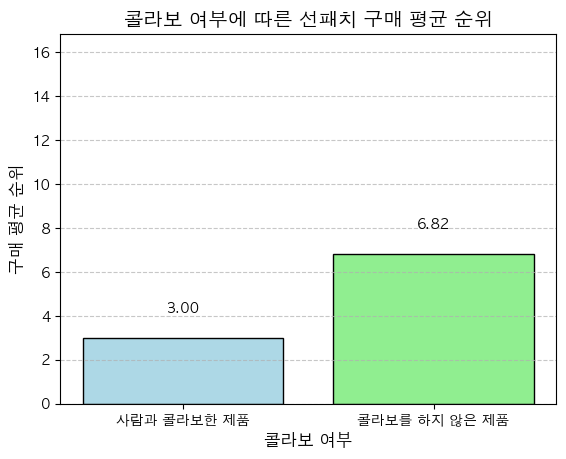

In [79]:
# 구매순위 그래프
x = [ '사람과 콜라보한 제품', '콜라보를 하지 않은 제품'] 
y = [people_rank_mean, non_people_buy_mean]

colors = ['lightblue', 'lightgreen', 'salmon']  
plt.bar(x, y, color=colors, edgecolor='black')

for i in range(len(x)):
    plt.text(i, y[i] + 1, f'{y[i]:.2f}', ha='center', va='bottom')

plt.title('콜라보 여부에 따른 선패치 구매 평균 순위', fontsize=14, fontweight='bold')
plt.xlabel('콜라보 여부', fontsize=12)
plt.ylabel('구매 평균 순위', fontsize=12)

plt.ylim(0, max(y) + 10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()